![ieseg logo](./img/ieseg.png)

#### MBD 2017-2018
# Statistical & Machine Learning Approaches for Marketing

## Section 2: Classification

**1. Import all required libraries and datasets**

In [48]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'caret'

The following object is masked from 'package:kknn':

    contr.dummy

The following object is masked from 'package:mlr':

    train

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



**2. Why not Linear Regression?**

In [6]:
# Import Default data
df <- Default
str(df)

# Print out the incident rate
table(df$default)/nrow(df)

'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...



    No    Yes 
0.9667 0.0333 

In [7]:
# Train test separate with stratified
set.seed(123)
train_idx <- createDataPartition(df$default, p=.7, list=FALSE)
train <- df[train_idx, ]
test <- df[-train_idx, ]

In [8]:
# Encode the response before fiting to Linear Regression model
train_lr <- train
test_lr <- test
train_lr$default <- as.numeric(train_lr$default) - 1
test_lr$default <- as.numeric(test_lr$default) - 1

# Fit Linear Regression model
md_lr <- lm(default ~ ., data=train_lr)
summary(md_lr)


Call:
lm(formula = default ~ ., data = train_lr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24806 -0.06961 -0.02651  0.02050  0.98408 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.551e-02  1.004e-02  -8.521   <2e-16 ***
studentYes  -7.722e-03  6.778e-03  -1.139    0.255    
balance      1.328e-04  4.249e-06  31.245   <2e-16 ***
income       3.211e-07  2.293e-07   1.401    0.161    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1683 on 6997 degrees of freedom
Multiple R-squared:  0.1241,	Adjusted R-squared:  0.1237 
F-statistic: 330.3 on 3 and 6997 DF,  p-value: < 2.2e-16


In [9]:
# Predict and evaluate
pred <- predict(md_lr, newdata=test_lr)
head(pred)
summary(pred)

# Convert probability to class
threshold <- (table(df$default) / nrow(df))[2]
print(paste0('Decision threshold=', threshold))
pred_lb <- as.numeric(pred >= threshold)

# Confusion matrix
confusionMatrix(pred_lb, test_lr$default)

# AUC
pred_roc <- roc(pred_lb, test_lr$default)
pred_auc <- auc(pred_roc)
print(paste0('AUC=', pred_auc))

2            3            4           12           13           14 
 0.019139873  0.067209672 -0.003784614  0.073067241 -0.044969896  0.009486215

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.08993 -0.01079  0.03414  0.03494  0.07768  0.26620 

[1] "Decision threshold=0.0333"


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1484    0
         1 1416   99
                                          
               Accuracy : 0.5278          
                 95% CI : (0.5098, 0.5458)
    No Information Rate : 0.967           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0647          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.51172         
            Specificity : 1.00000         
         Pos Pred Value : 1.00000         
         Neg Pred Value : 0.06535         
             Prevalence : 0.96699         
         Detection Rate : 0.49483         
   Detection Prevalence : 0.49483         
      Balanced Accuracy : 0.75586         
                                          
       'Positive' Class : 0               
                                          

[1] "AUC=0.532673267326733"


**3. Logistic Regression**

**3.1. Credit Card Default Data**

In [217]:
# Input data
library(ISLR)
df <- Default
str(df)

'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


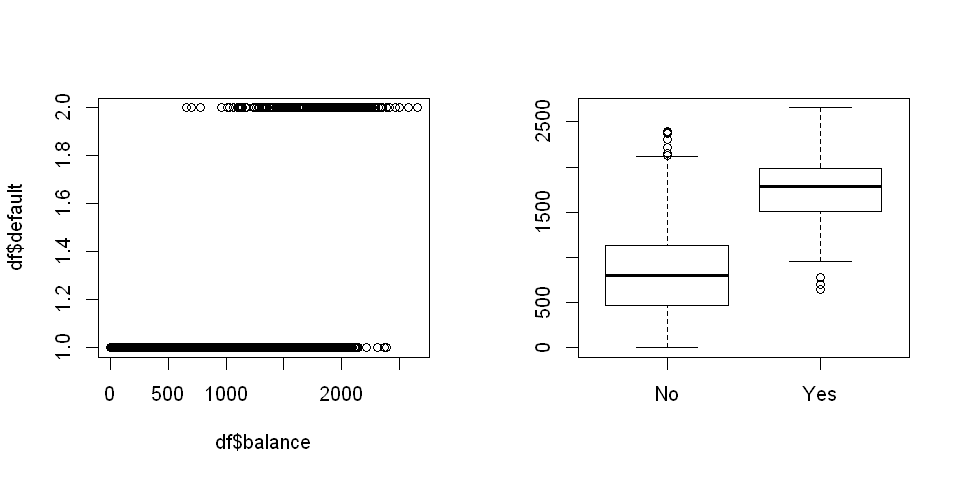

In [222]:
# Relationship between balance and default
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1, 2))
plot(df$balance, df$default)
boxplot(balance ~ default, data=df)

In [225]:
# Fit Logistic Regression model between balance and default
md_logreg <- glm(default ~ balance, data=df, family='binomial')
summary(md_logreg)


Call:
glm(formula = default ~ balance, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


In [226]:
# Fit Logistic Regression model between student and default
md_logreg <- glm(default ~ student, data=df, family='binomial')
summary(md_logreg)


Call:
glm(formula = default ~ student, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2970  -0.2970  -0.2434  -0.2434   2.6585  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.50413    0.07071  -49.55  < 2e-16 ***
studentYes   0.40489    0.11502    3.52 0.000431 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2908.7  on 9998  degrees of freedom
AIC: 2912.7

Number of Fisher Scoring iterations: 6


**3.2. South African Heart Disease Data**

In [18]:
# Input data
# Source: https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.info.txt
heart <- read.csv('./data/SAheart.csv', row.names=1)
str(heart)

'data.frame':	462 obs. of  10 variables:
 $ sbp      : int  160 144 118 170 134 132 142 114 114 132 ...
 $ tobacco  : num  12 0.01 0.08 7.5 13.6 6.2 4.05 4.08 0 0 ...
 $ ldl      : num  5.73 4.41 3.48 6.41 3.5 6.47 3.38 4.59 3.83 5.8 ...
 $ adiposity: num  23.1 28.6 32.3 38 27.8 ...
 $ famhist  : Factor w/ 2 levels "Absent","Present": 2 1 2 2 2 2 1 2 2 2 ...
 $ typea    : int  49 55 52 51 60 62 59 62 49 69 ...
 $ obesity  : num  25.3 28.9 29.1 32 26 ...
 $ alcohol  : num  97.2 2.06 3.81 24.26 57.34 ...
 $ age      : int  52 63 46 58 49 45 38 58 29 53 ...
 $ chd      : int  1 1 0 1 1 0 0 1 0 1 ...


In [232]:
# Cases and controls
table(heart$chd)


  0   1 
302 160 

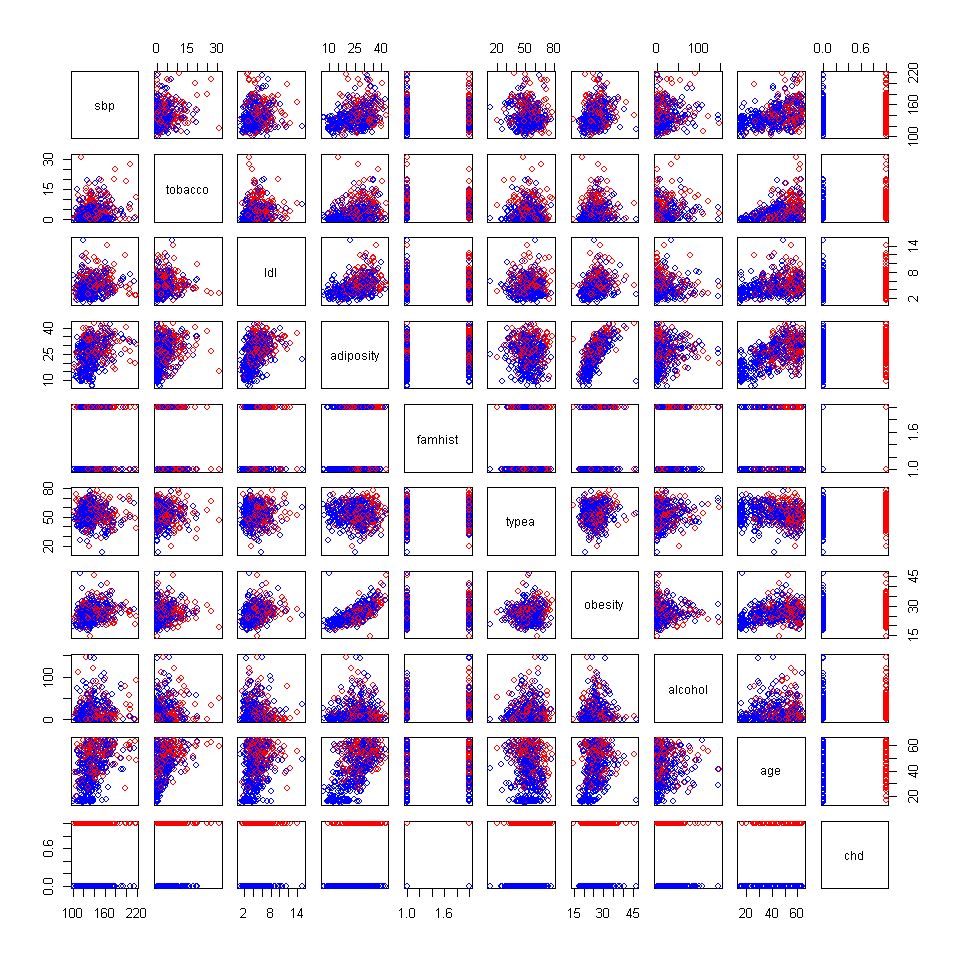

In [19]:
# Pair plot
options(repr.plot.width=8, repr.plot.height=8)
cols <- rep('red', nrow(heart))
cols[heart$chd == 0] <- 'blue'
pairs(heart, col=cols)

In [238]:
# Fit logistic regression model
md_logreg <- glm(chd ~ ., data=heart, family='binomial')
summary(md_logreg)


Call:
glm(formula = chd ~ ., family = "binomial", data = heart)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7781  -0.8213  -0.4387   0.8889   2.5435  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -6.1507209  1.3082600  -4.701 2.58e-06 ***
sbp             0.0065040  0.0057304   1.135 0.256374    
tobacco         0.0793764  0.0266028   2.984 0.002847 ** 
ldl             0.1739239  0.0596617   2.915 0.003555 ** 
adiposity       0.0185866  0.0292894   0.635 0.525700    
famhistPresent  0.9253704  0.2278940   4.061 4.90e-05 ***
typea           0.0395950  0.0123202   3.214 0.001310 ** 
obesity        -0.0629099  0.0442477  -1.422 0.155095    
alcohol         0.0001217  0.0044832   0.027 0.978350    
age             0.0452253  0.0121298   3.728 0.000193 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 596.11  on 461  degrees

**4. Discriminant Analysis**

**4.1. Linear Discriminant Analysis (LDA)**

In [14]:
# Load data
data(iris)
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [15]:
# Print out the class
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

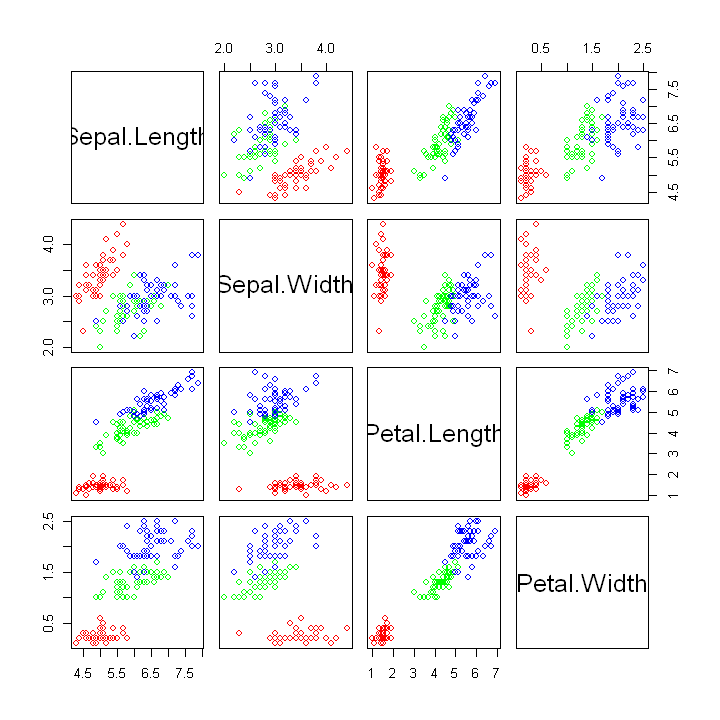

In [20]:
# Pair plot
options(repr.plot.width=6, repr.plot.height=6)
cols <- character(nrow(iris))
cols[] <- "black"
cols[iris$Species == "setosa"] <- "red"
cols[iris$Species == "versicolor"] <- "green"
cols[iris$Species == "virginica"] <- "blue"
pairs(iris[, -5], col=cols)

In [21]:
# Fit LDA model
library(MASS)
md_lda <- lda(Species ~ ., data=iris)
md_lda

Call:
lda(Species ~ ., data = iris)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.8293776  0.02410215
Sepal.Width   1.5344731  2.16452123
Petal.Length -2.2012117 -0.93192121
Petal.Width  -2.8104603  2.83918785

Proportion of trace:
   LD1    LD2 
0.9912 0.0088 

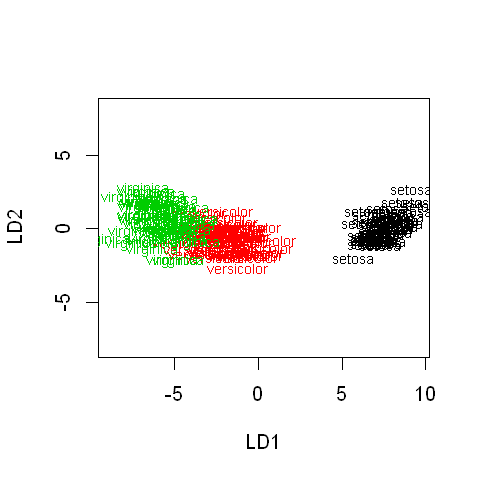

In [46]:
options(repr.plot.width=4, repr.plot.height=4)
plot(md_lda, col=as.integer(iris$Species), pch=20)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


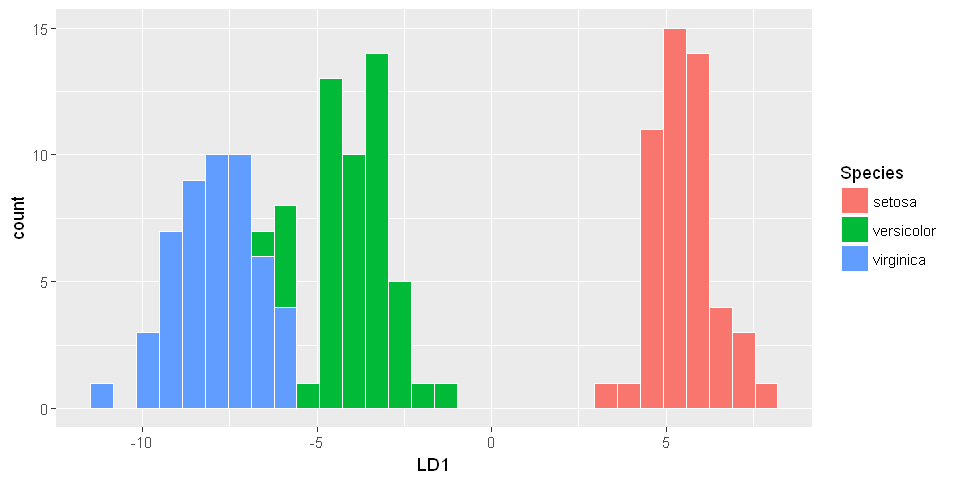

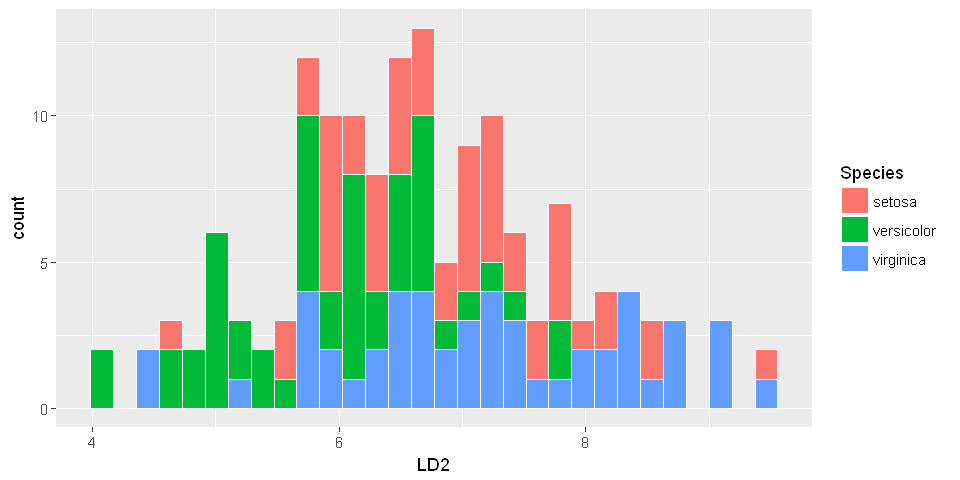

In [51]:
# Convert data points to new coordinate
ld1 <- as.matrix(iris[, -5]) %*% md_lda$scaling[, 1]  # 1st axis
ld2 <- as.matrix(iris[, -5]) %*% md_lda$scaling[, 2]  # 2nd axis

# Plot
iris_lda <- data.frame(LD1=ld1, LD2=ld2, Species=iris$Species)

options(repr.plot.width=8, repr.plot.height=4)
ggplot(data=iris_lda, aes(x=LD1, fill=Species)) + 
  geom_histogram(colour='white')

ggplot(data=iris_lda, aes(x=LD2, fill=Species)) + 
  geom_histogram(colour='white') 

In [23]:
# Make some prediction
lda_pred <- predict(md_lda)
head(lda_pred$posterior)

,setosa,versicolor,virginica
1,1,3.896358e-22,2.611168e-42
2,1,7.217970e-18,5.042143e-37
3,1,1.463849e-19,4.675932e-39
4,1,1.268536e-16,3.566610e-35
5,1,1.637387e-22,1.082605e-42
6,1,3.883282e-21,4.566540e-40


**4.2. Quadratic Discriminant Analysis (QDA)**

In [18]:
# Fit QDA model
library(MASS)
md_qda <- qda(Species ~ ., data=iris)
md_qda

Call:
qda(Species ~ ., data = iris)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

In [21]:
# Make some prediction
qda_pred <- predict(md_qda)
head(qda_pred$posterior)

,setosa,versicolor,virginica
1,1,4.918517e-26,2.981541e-41
2,1,7.655808e-19,1.311032e-34
3,1,1.552279e-21,3.380440e-36
4,1,8.300396e-19,8.541858e-32
5,1,3.365614e-27,2.010147e-41
6,1,1.472533e-26,1.271928e-40


## Lab: Logistic Regression, LDA, QDA and KNN

1. The Stock Market Data 2001-2005
2. Caravan Insurance Data
3. Student Performance Data

**Other multinomial datasets to practice:**
1. Soybean (Large) Data Set: http://archive.ics.uci.edu/ml/datasets/Soybean+%28Large%29
2. Glass Identification Data Set: https://archive.ics.uci.edu/ml/datasets/Glass+Identification
3. Car Evaluation Data Set: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

### Lab 1: The Stock Market Data 2001-2005

**1.1. Load and explore the stock market data**

In [144]:
# Require libraries
require(ISLR)  # Stock data sets
require(gridExtra)  # Arrange plot

# Load and explore the stock market data
str(Smarket)

'data.frame':	1250 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


In [145]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

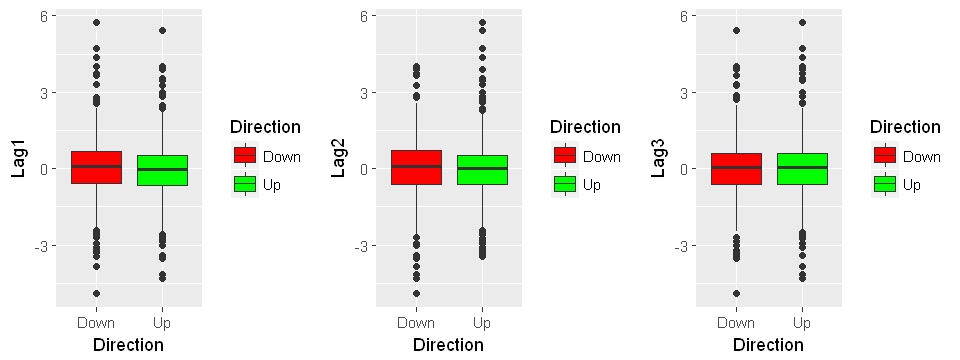

In [146]:
options(repr.plot.width=8, repr.plot.height=3)

p1 <- ggplot(Smarket[, c('Lag1', 'Lag2', 'Lag3', 'Direction')], aes(x=Direction, y=Lag1, fill=Direction)) +
  geom_boxplot() +
  scale_fill_manual(values = c("red", "green"))
p2 <- ggplot(Smarket[, c('Lag1', 'Lag2', 'Lag3', 'Direction')], aes(x=Direction, y=Lag2, fill=Direction)) +
  geom_boxplot() +
  scale_fill_manual(values = c("red", "green"))
p3 <- ggplot(Smarket[, c('Lag1', 'Lag2', 'Lag3', 'Direction')], aes(x=Direction, y=Lag3, fill=Direction)) +
  geom_boxplot() +
  scale_fill_manual(values = c("red", "green"))

grid.arrange(p1, p2, p3, nrow=1)

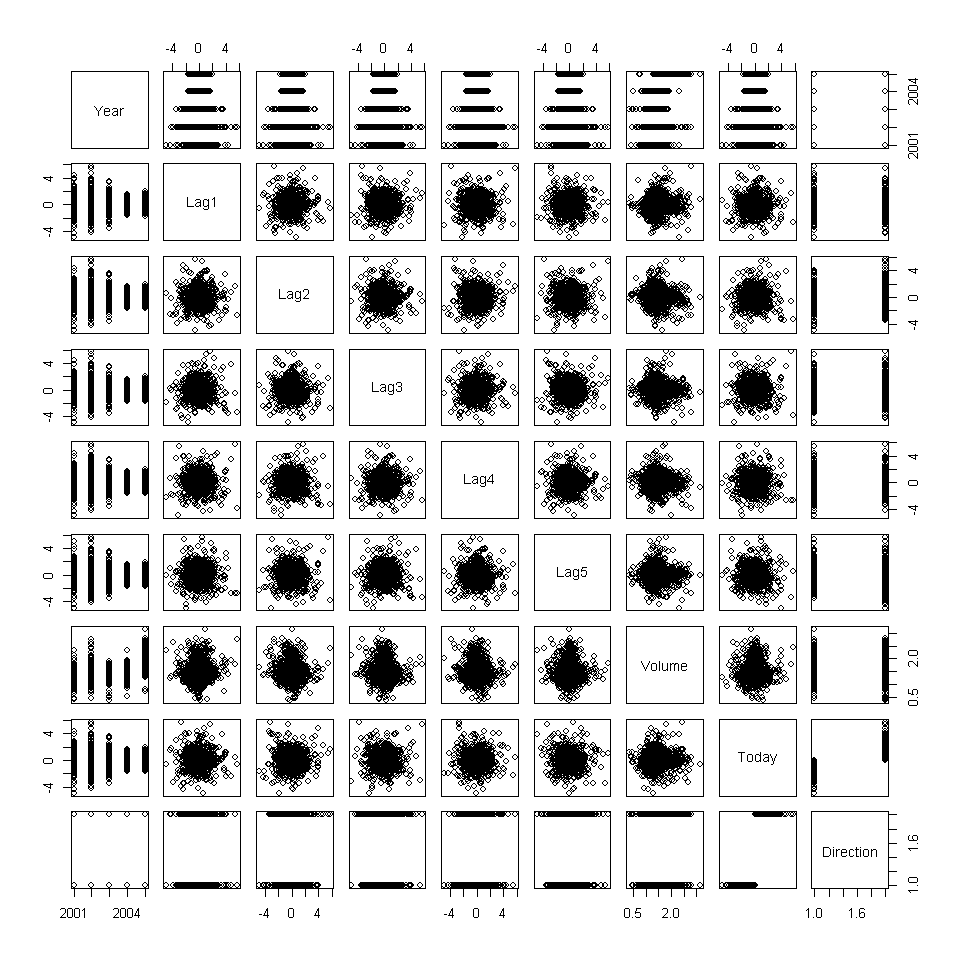

In [147]:
# Pair plot
options(repr.plot.width=8, repr.plot.height=8)
pairs(Smarket)

In [148]:
# Correlation matrix
cor(Smarket[, -9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


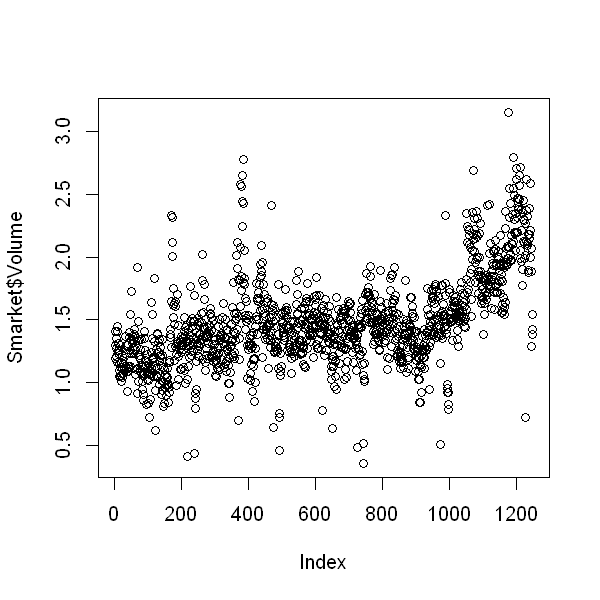

In [149]:
# Stock trading volume from 2001 to 2005
options(repr.plot.width=5, repr.plot.height=5)
plot(Smarket$Volume)

**1.2. Logistic Regression**

In [150]:
# Separate data to train and test
stock_train <- Smarket[Smarket$Year < 2005, ]
stock_test <- Smarket[Smarket$Year == 2005, ]

In [151]:
# Fit Logistic Regression model
md_logreg <- glm(Direction ∼ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
                 data=stock_train, family=binomial)
summary(md_logreg)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = stock_train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.302  -1.190   1.079   1.160   1.350  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.191213   0.333690   0.573    0.567
Lag1        -0.054178   0.051785  -1.046    0.295
Lag2        -0.045805   0.051797  -0.884    0.377
Lag3         0.007200   0.051644   0.139    0.889
Lag4         0.006441   0.051706   0.125    0.901
Lag5        -0.004223   0.051138  -0.083    0.934
Volume      -0.116257   0.239618  -0.485    0.628

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.1  on 991  degrees of freedom
AIC: 1395.1

Number of Fisher Scoring iterations: 3


In [152]:
# Re-fit Logistic Regression model with 2 best predictors
md_logreg <- glm(Direction ∼ Lag1 + Lag2,
                 data=stock_train, family=binomial)
summary(md_logreg)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = stock_train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.345  -1.188   1.074   1.164   1.326  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03222    0.06338   0.508    0.611
Lag1        -0.05562    0.05171  -1.076    0.282
Lag2        -0.04449    0.05166  -0.861    0.389

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 995  degrees of freedom
AIC: 1387.4

Number of Fisher Scoring iterations: 3


In [153]:
# Make prediction on both train and test data
pred_train_prob <- predict(md_logreg, newdata=stock_train, type='response')
head(pred_train_prob)

pred_test_prob <- predict(md_logreg, newdata=stock_test, type='response')
head(pred_test_prob)

1         2         3         4         5         6 
0.5048917 0.4904830 0.4830449 0.5052396 0.5064450 0.4982638

999      1000      1001      1002      1003      1004 
0.5098275 0.5208237 0.5332635 0.5260574 0.5072103 0.5061388

In [154]:
# Evaluation model on train
threshold <- 0.5  # Decision threshold
pred_train <- rep('Down', length(pred_train_prob))
pred_train[pred_train_prob > threshold] <- 'Up'

# Confusion matrix
print('Confusion matrix:')
table(pred_train, stock_train$Direction)

# Accuracy and error rate
acc <- mean(pred_train == stock_train$Direction)
err_rate <- 1 - acc
print(paste('Accuracy =', round(acc, 2), '%'))
print(paste('Error =', round(err_rate, 2), '%'))

[1] "Confusion matrix:"


          
pred_train Down  Up
      Down  168 160
      Up    323 347

[1] "Accuracy = 0.52 %"
[1] "Error = 0.48 %"


In [155]:
# Evaluation model on test
threshold <- 0.5  # Decision threshold
pred_test <- rep('Down', length(pred_test_prob))
pred_test[pred_test_prob > threshold] <- 'Up'

# Confusion matrix
print('Confusion matrix:')
table(pred_test, stock_test$Direction)

# Accuracy and error rate
acc <- mean(pred_test == stock_test$Direction)
err_rate <- 1 - acc
print(paste('Accuracy =', round(acc, 2), '%'))
print(paste('Error =', round(err_rate, 2), '%'))

[1] "Confusion matrix:"


         
pred_test Down  Up
     Down   35  35
     Up     76 106

[1] "Accuracy = 0.56 %"
[1] "Error = 0.44 %"


**1.3. Linear Discriminant Analysis (LDA)**

In [156]:
# Fit the LDA model with 2 best predictors from LogRes model
library(MASS)
md_lda <- lda(Direction ~ Lag1 + Lag2, data=stock_train)
md_lda

Call:
lda(Direction ~ Lag1 + Lag2, data = stock_train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

In [157]:
md_lda

Call:
lda(Direction ~ Lag1 + Lag2, data = stock_train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

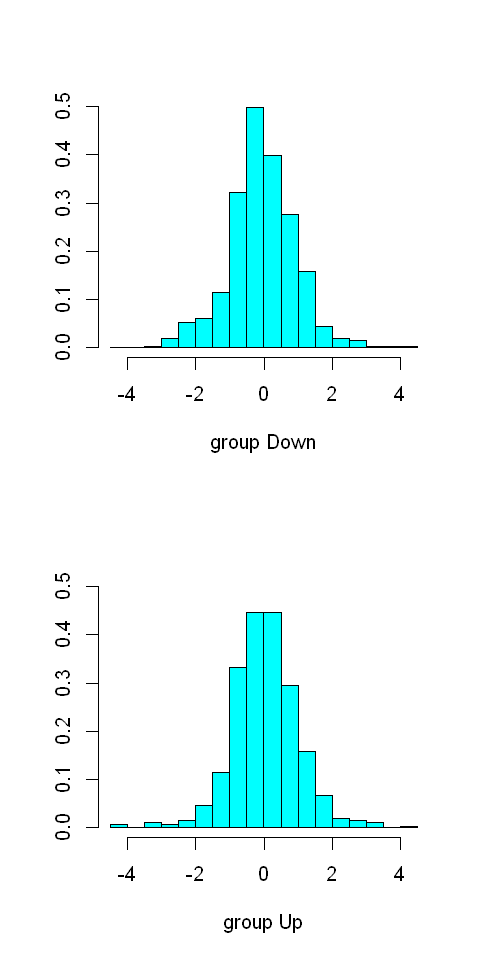

In [158]:
options(repr.plot.width=4, repr.plot.height=8)
plot(md_lda)

In [159]:
# Predict and evaluate
lda_pred <- predict(md_lda, newdata=stock_test)
head(lda_pred$class)
head(lda_pred$posterior)

# Confusion matrix
print('Confusion matrix:')
table(lda_pred$class, stock_test$Direction)

# Accuracy
acc <- mean(lda_pred$class == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] Up Up Up Up Up Up
Levels: Down Up

,Down,Up
999,0.4901792,0.5098208
1000,0.4792185,0.5207815
1001,0.4668185,0.5331815
1002,0.4740011,0.5259989
1003,0.4927877,0.5072123
1004,0.4938562,0.5061438


[1] "Confusion matrix:"


      
       Down  Up
  Down   35  35
  Up     76 106

[1] "Accuracy = 0.56 %"


**1.4. Quadratic Discriminant Analysis (QDA)**

In [160]:
# Fit the QDA model on train set with 2 best predictors
md_qda <- qda(Direction ~ Lag1 + Lag2, data=stock_train)
md_qda

Call:
qda(Direction ~ Lag1 + Lag2, data = stock_train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [161]:
# Predict and evaluate
qda_pred <- predict(md_qda, newdata=stock_test)
head(qda_pred$class)
head(qda_pred$posterior)

# Confusion matrix
print('Confusion matrix:')
table(qda_pred$class, stock_test$Direction)

# Accuracy
acc <- mean(qda_pred$class == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] Up Up Up Up Up Up
Levels: Down Up

,Down,Up
999,0.4873243,0.5126757
1000,0.4759011,0.5240989
1001,0.4636911,0.5363089
1002,0.4739253,0.5260747
1003,0.4903426,0.5096574
1004,0.4913561,0.5086439


[1] "Confusion matrix:"


      
       Down  Up
  Down   30  20
  Up     81 121

[1] "Accuracy = 0.6 %"


**1.5. K-Nearest Neighbors (KNN)**

In [162]:
# Fit the KNN model with the train set using 2 best predictors
library(class)

# k = 1
set.seed(123)
knn1_pred <- knn(train=stock_train[, c('Lag1', 'Lag2')],
                 test=stock_test[, c('Lag1', 'Lag2')],
                 cl=stock_train$Direction,
                 k=1)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, stock_test$Direction)

# Accuracy
acc <- mean(knn1_pred == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred Down Up
     Down   43 58
     Up     68 83

[1] "Accuracy = 0.5 %"


In [163]:
# k = 3
set.seed(123)
knn3_pred <- knn(train=stock_train[, c('Lag1', 'Lag2')],
                 test=stock_test[, c('Lag1', 'Lag2')],
                 cl=stock_train$Direction,
                 k=3)

# Confusion matrix
print('Confusion matrix:')
table(knn3_pred, stock_test$Direction)

# Accuracy
acc <- mean(knn3_pred == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn3_pred Down Up
     Down   48 55
     Up     63 86

[1] "Accuracy = 0.53 %"


### Lab 2: Caravan Insurance Data

In [115]:
# Load data, 58 predictors, demographics characters
library(ISLR)
str(Caravan)

'data.frame':	5822 obs. of  86 variables:
 $ MOSTYPE : num  33 37 37 9 40 23 39 33 33 11 ...
 $ MAANTHUI: num  1 1 1 1 1 1 2 1 1 2 ...
 $ MGEMOMV : num  3 2 2 3 4 2 3 2 2 3 ...
 $ MGEMLEEF: num  2 2 2 3 2 1 2 3 4 3 ...
 $ MOSHOOFD: num  8 8 8 3 10 5 9 8 8 3 ...
 $ MGODRK  : num  0 1 0 2 1 0 2 0 0 3 ...
 $ MGODPR  : num  5 4 4 3 4 5 2 7 1 5 ...
 $ MGODOV  : num  1 1 2 2 1 0 0 0 3 0 ...
 $ MGODGE  : num  3 4 4 4 4 5 5 2 6 2 ...
 $ MRELGE  : num  7 6 3 5 7 0 7 7 6 7 ...
 $ MRELSA  : num  0 2 2 2 1 6 2 2 0 0 ...
 $ MRELOV  : num  2 2 4 2 2 3 0 0 3 2 ...
 $ MFALLEEN: num  1 0 4 2 2 3 0 0 3 2 ...
 $ MFGEKIND: num  2 4 4 3 4 5 3 5 3 2 ...
 $ MFWEKIND: num  6 5 2 4 4 2 6 4 3 6 ...
 $ MOPLHOOG: num  1 0 0 3 5 0 0 0 0 0 ...
 $ MOPLMIDD: num  2 5 5 4 4 5 4 3 1 4 ...
 $ MOPLLAAG: num  7 4 4 2 0 4 5 6 8 5 ...
 $ MBERHOOG: num  1 0 0 4 0 2 0 2 1 2 ...
 $ MBERZELF: num  0 0 0 0 5 0 0 0 1 0 ...
 $ MBERBOER: num  1 0 0 0 4 0 0 0 0 0 ...
 $ MBERMIDD: num  2 5 7 3 0 4 4 2 1 3 ...
 $ MBERARBG: num  5 0 0 

In [117]:
# Response ratio
table(Caravan$Purchase)/nrow(Caravan)


        No        Yes 
0.94022673 0.05977327 

In [189]:
# Data processing, scale data for KNN
Caravan_scaled <- data.frame(scale(Caravan[, -86]))
Caravan_scaled['Purchase'] <- Caravan[, 'Purchase']

mean(Caravan_scaled[, 1])  # Mean = 0
var(Caravan_scaled[, 1])  # Variance = Standard deviation = 1
head(Caravan_scaled)

[1] -7.025576e-17

[1] 1

MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0.68084775,-0.2725565,0.4066617,-1.21685949,0.7793384,-0.6942510,0.2174254,-0.06870474,-0.1618019,0.42763309,...,-0.07315883,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No
0.99221162,-0.2725565,-0.8594262,-1.21685949,0.7793384,0.3025256,-0.3653787,-0.06870474,0.4641188,-0.09606902,...,-0.07315883,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No
0.99221162,-0.2725565,-0.8594262,-1.21685949,0.7793384,-0.6942510,-0.3653787,0.91409379,0.4641188,-1.66717535,...,-0.07315883,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No
-1.18733547,-0.2725565,0.4066617,0.01075374,-0.9708962,1.2993023,-0.9481828,0.91409379,0.4641188,-0.61977113,...,-0.07315883,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No
1.22573452,-0.2725565,1.6727497,-1.21685949,1.4794323,0.3025256,-0.3653787,-0.06870474,0.4641188,0.42763309,...,-0.07315883,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No
-0.09756193,-0.2725565,-0.8594262,-2.44447272,-0.2708024,-0.6942510,0.2174254,-1.05150327,1.0900394,-3.23828168,...,-0.07315883,-0.08104764,-0.05991487,-1.014271,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No


In [190]:
# Train test spliting
set.seed(123)
train_idx <- createDataPartition(Y, p=.7, list=FALSE)

# Train dataset
train <- Caravan[train_idx, ]
train_scaled <- Caravan_scaled[train_idx, ]

# Test dataset
test <- Caravan[-train_idx, ]
test_scaled <- Caravan_scaled[-train_idx, ]

In [195]:
# Fit KNN model k=1
pred_knn <- knn(train=train_scaled[, -86], test=test_scaled[, -86], cl=train_scaled[, 86], k=1)

# Evaluation
table(pred_knn, test$Purchase)
acc <- mean(pred_knn == test_scaled$Purchase)
TP <- table(pred_knn, test_scaled$Purchase)[2, 2]
TN <- table(pred_knn, test_scaled$Purchase)[1, 1]
FP <- table(pred_knn, test_scaled$Purchase)[2, 1]
FN <- table(pred_knn, test_scaled$Purchase)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

        
pred_knn   No  Yes
     No  1538   91
     Yes  104   13

[1] "Accuracy = 0.89"
[1] "Precision = 0.11"
[1] "Sensitivity (TPR) = 0.12"
[1] "Specificity (TNR) = 0.94"


In [198]:
# Fit KNN model k=2
pred_knn <- knn(train=train_scaled[, -86], test=test_scaled[, -86], cl=train_scaled[, 86], k=2)

# Evaluation
table(pred_knn, test_scaled$Purchase)
acc <- mean(pred_knn == test$Purchase)
TP <- table(pred_knn, test_scaled$Purchase)[2, 2]
TN <- table(pred_knn, test_scaled$Purchase)[1, 1]
FP <- table(pred_knn, test_scaled$Purchase)[2, 1]
FN <- table(pred_knn, test_scaled$Purchase)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

        
pred_knn   No  Yes
     No  1546   88
     Yes   96   16

[1] "Accuracy = 0.89"
[1] "Precision = 0.14"
[1] "Sensitivity (TPR) = 0.15"
[1] "Specificity (TNR) = 0.94"


In [179]:
# Fit Logistic Regression model
md_logreg <- glm(Purchase ~ ., data=train, family=binomial)

# Make prediction
pred_logreg <- predict(md_logreg, newdata=test, type='response')
head(pred_logreg)

# Decision threshold = 0.5
threshold <- 0.5
pred <- rep('No', nrow(test))
pred[pred_logreg > threshold] <- 'Yes'

# Evaluation
table(pred, test$Purchase)
acc <- mean(pred == test$Purchase)
TP <- table(pred, test$Purchase)[2, 2]
TN <- table(pred, test$Purchase)[1, 1]
FP <- table(pred, test$Purchase)[2, 1]
FN <- table(pred, test$Purchase)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

1          2          7          9         12         14 
0.14462770 0.00996597 0.03068466 0.02577970 0.07082826 0.01448682

     
pred    No  Yes
  No  1639  102
  Yes    3    2

[1] "Accuracy = 0.94"
[1] "Precision = 0.4"
[1] "Sensitivity (TPR) = 0.02"
[1] "Specificity (TNR) = 1"


In [204]:
# Decision threshold = 0.25
threshold <- 0.25
pred <- rep('No', nrow(test))
pred[pred_logreg > threshold] <- 'Yes'

# Evaluation
table(pred, test$Purchase)
acc <- mean(pred == test$Purchase)
TP <- table(pred, test$Purchase)[2, 2]
TN <- table(pred, test$Purchase)[1, 1]
FP <- table(pred, test$Purchase)[2, 1]
FN <- table(pred, test$Purchase)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

     
pred    No  Yes
  No  1589   88
  Yes   53   16

[1] "Accuracy = 0.92"
[1] "Precision = 0.23"
[1] "Sensitivity (TPR) = 0.15"
[1] "Specificity (TNR) = 0.97"


### Lab 3: Student Performance Data

**3.1. Data exploration**

In [5]:
# Required library
library(mlr)
require(kknn)  # kNN
require(MASS)  # LDA, QDA
require(nnet)  # Multinomial LogRes

Loading required package: ParamHelpers
Warning message:
"replacing previous import 'BBmisc::isFALSE' by 'backports::isFALSE' when loading 'mlr'"Loading required package: kknn
Loading required package: MASS


In [100]:
# Import data
student <- read.csv('./data/student/student-mat.csv', sep=';')
str(student)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [59]:
# Check NA
apply(is.na(student), 2, sum)

school        sex        age    address    famsize    Pstatus       Medu 
         0          0          0          0          0          0          0 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
         0          0          0          0          0          0          0 
  failures  schoolsup     famsup       paid activities    nursery     higher 
         0          0          0          0          0          0          0 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
         0          0          0          0          0          0          0 
    health   absences         G1         G2         G3 
         0          0          0          0          0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.00   11.00   10.42   14.00   20.00 

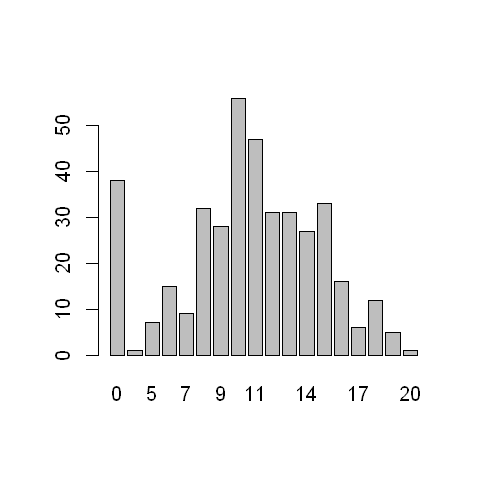

In [60]:
# Check target variable
summary(student$G3)

options(repr.plot.width=4, repr.plot.height=4)
barplot(table(student$G3))

**3.2. Binomial classification**

In [136]:
# Input data (again)
student <- read.csv('./data/student/student-mat.csv', sep=';')

# Bin target variable into 2 groups: pass = Y/N
student$pass <- 'N'
student[student$G3 >= 10, 'pass'] <- 'Y'

table(student$pass)
table(student$pass)/nrow(student)


  N   Y 
130 265 


        N         Y 
0.3291139 0.6708861 

In [117]:
# Drop the previous target column
student$G3 <- NULL

**Test Logistic Regression (LogRes) model, 10-fold CV**

In [103]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask(id="student", data=student, target="pass")

# Run the k-fold CV
resample(lnr_logreg, task_logreg, rdesc, measures=list(auc))

[Resample] cross-validation iter 1: Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"auc.test.mean=0.907
[Resample] cross-validation iter 2: Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"auc.test.mean=0.815
[Resample] cross-validation iter 3: Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"auc.test.mean=0.997
[Resample] cross-validation iter 4: Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"auc.test.mean=0.983
[Resample] cross-validation iter 5: Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"auc.test.mean=0.818
[Resample] cross-validation iter 6: Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"auc.test.mean=0.894
[Resample] cross-validation iter 7: Warning me

Resample Result
Task: student
Learner: classif.logreg
Aggr perf: auc.test.mean=0.908
Runtime: 0.863286

**Test Linear Discriminant Analysis (LDA) model, 10-fold CV**

In [104]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_lda <- makeLearner("classif.lda", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask(id="student", data=student, target="pass")

# Run the k-fold CV
resample(lnr_lda, task_logreg, rdesc, measures=list(auc))

[Resample] cross-validation iter 1: auc.test.mean=0.941
[Resample] cross-validation iter 2: auc.test.mean=0.997
[Resample] cross-validation iter 3: auc.test.mean=0.963
[Resample] cross-validation iter 4: auc.test.mean=0.923
[Resample] cross-validation iter 5: auc.test.mean=0.944
[Resample] cross-validation iter 6: auc.test.mean=0.904
[Resample] cross-validation iter 7: auc.test.mean=0.994
[Resample] cross-validation iter 8: auc.test.mean=0.968
[Resample] cross-validation iter 9: auc.test.mean=0.98
[Resample] cross-validation iter 10: auc.test.mean=0.944
[Resample] Aggr. Result: auc.test.mean=0.956


Resample Result
Task: student
Learner: classif.lda
Aggr perf: auc.test.mean=0.956
Runtime: 1.06983

**Test Quadratic Discriminant Analysis (QDA) model, 10-fold CV**

In [106]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_qda <- makeLearner("classif.qda", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask(id="student", data=student, target="pass")

# Run the k-fold CV
resample(lnr_qda, task_logreg, rdesc, measures=list(auc))

[Resample] cross-validation iter 1: auc.test.mean=0.777
[Resample] cross-validation iter 2: auc.test.mean=0.805
[Resample] cross-validation iter 3: auc.test.mean=0.844
[Resample] cross-validation iter 4: auc.test.mean=0.779
[Resample] cross-validation iter 5: auc.test.mean=0.778
[Resample] cross-validation iter 6: auc.test.mean=0.776
[Resample] cross-validation iter 7: auc.test.mean=0.896
[Resample] cross-validation iter 8: auc.test.mean=0.901
[Resample] cross-validation iter 9: auc.test.mean=0.869
[Resample] cross-validation iter 10: auc.test.mean=0.972
[Resample] Aggr. Result: auc.test.mean=0.84


Resample Result
Task: student
Learner: classif.qda
Aggr perf: auc.test.mean=0.84
Runtime: 0.476768

**Test k-Nearest Neighbor (kNN) model, k=1, 10-fold CV**

In [118]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=1)

# Define the model
task_logreg <- makeClassifTask(id="student", data=student, target="pass")

# Run the k-fold CV
resample(lnr_knn, task_logreg, rdesc, measures=list(auc))

[Resample] cross-validation iter 1: auc.test.mean=0.626
[Resample] cross-validation iter 2: auc.test.mean=0.706
[Resample] cross-validation iter 3: auc.test.mean=0.663
[Resample] cross-validation iter 4: auc.test.mean=0.865
[Resample] cross-validation iter 5: auc.test.mean=0.524
[Resample] cross-validation iter 6: auc.test.mean=0.647
[Resample] cross-validation iter 7: auc.test.mean=0.696
[Resample] cross-validation iter 8: auc.test.mean=0.706
[Resample] cross-validation iter 9: auc.test.mean=0.652
[Resample] cross-validation iter 10: auc.test.mean=0.615
[Resample] Aggr. Result: auc.test.mean=0.67


Resample Result
Task: student
Learner: classif.kknn
Aggr perf: auc.test.mean=0.67
Runtime: 0.697352

**Test k-Nearest Neighbor (kNN) model, k=100, 10-fold CV**

In [138]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=100)

# Define the model
task_logreg <- makeClassifTask(id="student", data=student, target="pass")

# Run the k-fold CV
resample(lnr_knn, task_logreg, rdesc, measures=list(auc))

[Resample] cross-validation iter 1: auc.test.mean=0.929
[Resample] cross-validation iter 2: auc.test.mean=0.955
[Resample] cross-validation iter 3: auc.test.mean=0.987
[Resample] cross-validation iter 4: auc.test.mean=0.94
[Resample] cross-validation iter 5: auc.test.mean=0.963
[Resample] cross-validation iter 6: auc.test.mean=0.994
[Resample] cross-validation iter 7: auc.test.mean=0.949
[Resample] cross-validation iter 8: auc.test.mean=0.881
[Resample] cross-validation iter 9: auc.test.mean=0.994
[Resample] cross-validation iter 10: auc.test.mean=0.938
[Resample] Aggr. Result: auc.test.mean=0.953


Resample Result
Task: student
Learner: classif.kknn
Aggr perf: auc.test.mean=0.953
Runtime: 0.711608

**3.3. Multinomial classification**

In [2]:
require(nnet)  # One-vs-All Logistic Regression


         A         A-          B         B+          C          F 
0.10126582 0.15189873 0.07848101 0.07848101 0.26075949 0.32911392 

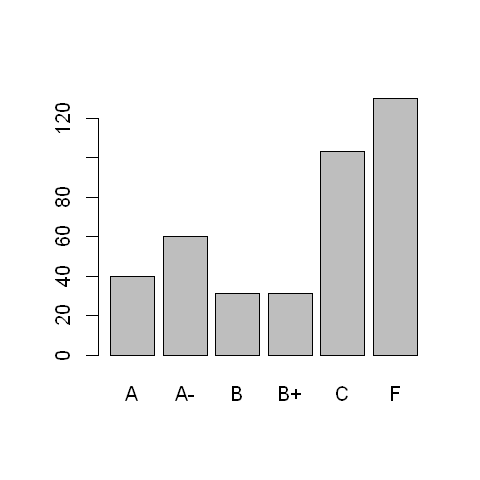

In [3]:
# Input data (again)
student <- read.csv('./data/student/student-mat.csv', sep=';')

# Bin target variable into group
# Refs: http://www.canada.campusfrance.org/en/faq/french-grading-system-same-canadian-system

student$final_grade <- 'F'
student[student$G3 >= 10 & student$G3 <= 11.9, 'final_grade'] <- 'C'
student[student$G3 >= 12 & student$G3 <= 12.9, 'final_grade'] <- 'B'
student[student$G3 >= 13 & student$G3 <= 13.9, 'final_grade'] <- 'B+'
student[student$G3 >= 14 & student$G3 <= 15.9, 'final_grade'] <- 'A-'
student[student$G3 >= 16 & student$G3 <= 20, 'final_grade'] <- 'A'

table(student$final_grade)/nrow(student)

options(repr.plot.width=4, repr.plot.height=4)
barplot(table(student$final_grade))

In [123]:
# Drop the numeric target variable
student$G3 <- NULL

**Test One-vs-All Logistic Regression (LogRes) model, 10-fold CV**

In [6]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.multinom", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask(id="student", data=student, target="final_grade")

# Run the k-fold CV
resample(lnr_logreg, task_logreg, rdesc, measures=list(acc))

[Resample] cross-validation iter 1: 

# weights:  264 (215 variable)
initial  value 636.074612 
iter  10 value 360.148374
iter  20 value 266.802915
iter  30 value 209.132754
iter  40 value 156.488425
iter  50 value 76.056937
iter  60 value 18.125911
iter  70 value 0.140126
iter  80 value 0.000560
final  value 0.000065 
converged


acc.test.mean=0.65
[Resample] cross-validation iter 2: 

# weights:  264 (215 variable)
initial  value 637.866371 
iter  10 value 366.999491
iter  20 value 288.710955
iter  30 value 221.422375
iter  40 value 170.741865
iter  50 value 87.589253
iter  60 value 25.890184
iter  70 value 0.240333
iter  80 value 0.001909
iter  90 value 0.000155
iter  90 value 0.000079
iter  90 value 0.000058
final  value 0.000058 
converged


acc.test.mean=0.59
[Resample] cross-validation iter 3: 

# weights:  264 (215 variable)
initial  value 636.074612 
iter  10 value 369.709153
iter  20 value 301.662566
iter  30 value 224.370992
iter  40 value 179.576441
iter  50 value 91.951044
iter  60 value 26.387186
iter  70 value 0.738748
iter  80 value 0.001680
final  value 0.000079 
converged


acc.test.mean= 0.8
[Resample] cross-validation iter 4: 

# weights:  264 (215 variable)
initial  value 636.074612 
iter  10 value 382.380691
iter  20 value 302.569272
iter  30 value 221.167601
iter  40 value 168.809077
iter  50 value 73.426937
iter  60 value 16.742428
iter  70 value 0.203750
iter  80 value 0.004378
iter  90 value 0.000267
final  value 0.000058 
converged


acc.test.mean=0.75
[Resample] cross-validation iter 5: 

# weights:  264 (215 variable)
initial  value 637.866371 
iter  10 value 379.124363
iter  20 value 291.362766
iter  30 value 219.094997
iter  40 value 174.407526
iter  50 value 93.521769
iter  60 value 36.071654
iter  70 value 0.734846
iter  80 value 0.004873
final  value 0.000051 
converged


acc.test.mean=0.667
[Resample] cross-validation iter 6: 

# weights:  264 (215 variable)
initial  value 636.074612 
iter  10 value 343.948041
iter  20 value 279.205560
iter  30 value 209.744455
iter  40 value 155.781971
iter  50 value 62.844886
iter  60 value 10.661585
iter  70 value 0.077570
iter  80 value 0.000266
final  value 0.000068 
converged


acc.test.mean= 0.7
[Resample] cross-validation iter 7: 

# weights:  264 (215 variable)
initial  value 636.074612 
iter  10 value 386.872777
iter  20 value 282.736610
iter  30 value 205.821178
iter  40 value 154.093327
iter  50 value 65.699362
iter  60 value 7.382167
iter  70 value 0.054350
iter  80 value 0.000300
final  value 0.000079 
converged


acc.test.mean= 0.6
[Resample] cross-validation iter 8: 

# weights:  264 (215 variable)
initial  value 637.866371 
iter  10 value 365.571138
iter  20 value 283.567340
iter  30 value 220.132387
iter  40 value 166.555510
iter  50 value 87.827494
iter  60 value 26.205855
iter  70 value 0.211641
iter  80 value 0.003192
final  value 0.000050 
converged


acc.test.mean=0.667
[Resample] cross-validation iter 9: 

# weights:  264 (215 variable)
initial  value 637.866371 
iter  10 value 353.072757
iter  20 value 276.059962
iter  30 value 208.934043
iter  40 value 157.807834
iter  50 value 71.797932
iter  60 value 11.474516
iter  70 value 0.260698
iter  80 value 0.002094
final  value 0.000065 
converged


acc.test.mean=0.59
[Resample] cross-validation iter 10: 

# weights:  264 (215 variable)
initial  value 637.866371 
iter  10 value 390.203186
iter  20 value 309.922523
iter  30 value 217.539178
iter  40 value 165.097490
iter  50 value 82.766890
iter  60 value 22.051684
iter  70 value 0.115651
iter  80 value 0.000527
final  value 0.000073 
converged


acc.test.mean=0.615
[Resample] Aggr. Result: acc.test.mean=0.663


Resample Result
Task: student
Learner: classif.multinom
Aggr perf: acc.test.mean=0.663
Runtime: 2.7573

**Test Linear Discriminant Analysis (LDA) model, 10-fold CV**

In [7]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_lda <- makeLearner("classif.lda", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask(id="student", data=student, target="final_grade")

# Run the k-fold CV
resample(lnr_lda, task_logreg, rdesc, measures=list(acc))

[Resample] cross-validation iter 1: acc.test.mean=0.538
[Resample] cross-validation iter 2: acc.test.mean=0.718
[Resample] cross-validation iter 3: acc.test.mean=0.675
[Resample] cross-validation iter 4: acc.test.mean=0.725
[Resample] cross-validation iter 5: acc.test.mean=0.795
[Resample] cross-validation iter 6: acc.test.mean= 0.5
[Resample] cross-validation iter 7: acc.test.mean=0.875
[Resample] cross-validation iter 8: acc.test.mean= 0.7
[Resample] cross-validation iter 9: acc.test.mean=0.641
[Resample] cross-validation iter 10: acc.test.mean=0.692
[Resample] Aggr. Result: acc.test.mean=0.686


Resample Result
Task: student
Learner: classif.lda
Aggr perf: acc.test.mean=0.686
Runtime: 0.543502

**Test Quadratic Discriminant Analysis (QDA) model, 10-fold CV**

In [12]:
# !!! Error caused by the low number of observations in class

# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_qda <- makeLearner("classif.qda", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask(id="student", data=student, target="final_grade")

# Run the k-fold CV
resample(lnr_qda, task_logreg, rdesc, measures=list(acc))

[Resample] cross-validation iter 1: 

ERROR: Error in qda.default(x, grouping, ...): some group is too small for 'qda'


**Test k-Nearest Neighbor (kNN) model, k=1, 10-fold CV**

In [130]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=1)

# Define the model
task_logreg <- makeClassifTask(id="student", data=student, target="final_grade")

# Run the k-fold CV
resample(lnr_knn, task_logreg, rdesc, measures=list(acc))

[Resample] cross-validation iter 1: acc.test.mean=0.385
[Resample] cross-validation iter 2: acc.test.mean=0.359
[Resample] cross-validation iter 3: acc.test.mean=0.325
[Resample] cross-validation iter 4: acc.test.mean=0.538
[Resample] cross-validation iter 5: acc.test.mean=0.325
[Resample] cross-validation iter 6: acc.test.mean=0.35
[Resample] cross-validation iter 7: acc.test.mean=0.462
[Resample] cross-validation iter 8: acc.test.mean=0.425
[Resample] cross-validation iter 9: acc.test.mean=0.35
[Resample] cross-validation iter 10: acc.test.mean=0.359
[Resample] Aggr. Result: acc.test.mean=0.388


Resample Result
Task: student
Learner: classif.kknn
Aggr perf: acc.test.mean=0.388
Runtime: 0.905397

**Test k-Nearest Neighbor (kNN) model, k=100, 10-fold CV**

In [134]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=100)

# Define the model
task_logreg <- makeClassifTask(id="student", data=student, target="final_grade")

# Run the k-fold CV
resample(lnr_knn, task_logreg, rdesc, measures=list(acc))

[Resample] cross-validation iter 1: acc.test.mean=0.425
[Resample] cross-validation iter 2: acc.test.mean=0.525
[Resample] cross-validation iter 3: acc.test.mean=0.564
[Resample] cross-validation iter 4: acc.test.mean=0.564
[Resample] cross-validation iter 5: acc.test.mean=0.675
[Resample] cross-validation iter 6: acc.test.mean=0.615
[Resample] cross-validation iter 7: acc.test.mean=0.667
[Resample] cross-validation iter 8: acc.test.mean=0.375
[Resample] cross-validation iter 9: acc.test.mean=0.575
[Resample] cross-validation iter 10: acc.test.mean=0.538
[Resample] Aggr. Result: acc.test.mean=0.552


Resample Result
Task: student
Learner: classif.kknn
Aggr perf: acc.test.mean=0.552
Runtime: 0.476773